In [94]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [167]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [98]:
# Overview of data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# Basic statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
train_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [102]:
#copy data sete
train=train_data.copy()

In [103]:
numeric_cols = ['Age', 'Pclass','Survived', 'SibSp', 'Parch', 'Fare']


**Correlation Matrix**

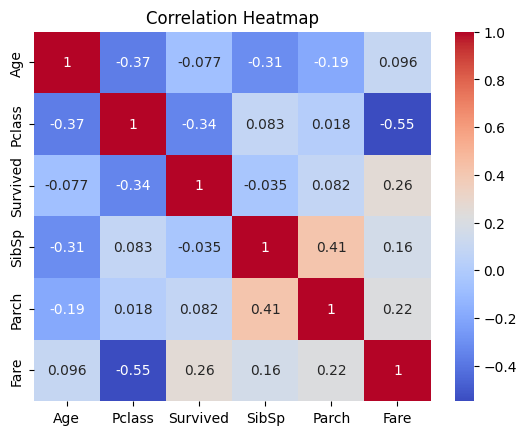

In [104]:
#correlaton
corr = train_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Covariance Matrix**

In [105]:
train_data[numeric_cols].cov()


,Age,Pclass,Survived,SibSp,Parch,Fare
Age,211.019125,-4.496004,-0.551296,-4.163334,-2.344191,73.849030
Pclass,-4.496004,0.699015,-0.137703,0.076599,0.012429,-22.830196
Survived,-0.551296,-0.137703,0.236772,-0.018954,0.032017,6.221787
SibSp,-4.163334,0.076599,-0.018954,1.216043,0.368739,8.748734
Parch,-2.344191,0.012429,0.032017,0.368739,0.649728,8.661052
Fare,73.849030,-22.830196,6.221787,8.748734,8.661052,2469.436846


# **KNN Imputation**

In [106]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(train[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])
train['Age'] = imputed[:, 0]  # Only update the Age column


**Check How Many Nulls Were Filled**

In [107]:
print("Missing Age values before:", train_data['Age'].isnull().sum())
print("Missing Age values after :", train['Age'].isnull().sum())


Missing Age values before: 177
Missing Age values after : 0


## **Visual Comparison**

**📊 Histogram before and after:**

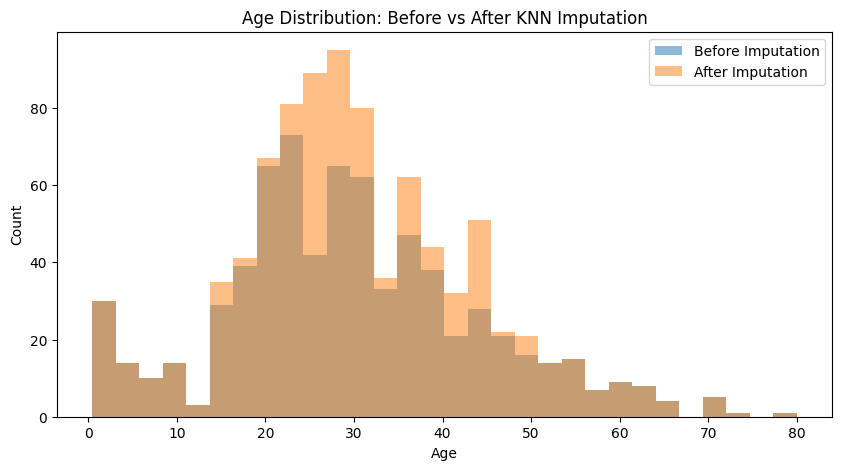

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(train_data['Age'].dropna(), bins=30, alpha=0.5, label='Before Imputation')
plt.hist(train['Age'], bins=30, alpha=0.5, label='After Imputation')
plt.legend()
plt.title('Age Distribution: Before vs After KNN Imputation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [109]:
train['Cabin'] = train['Cabin'].fillna('no_class')

**Target Variable Distribution**

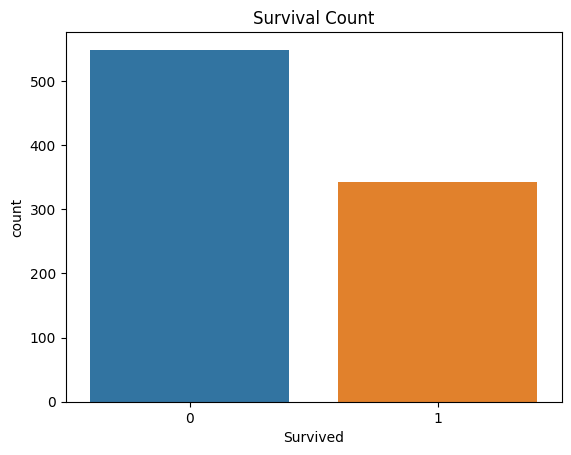

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [110]:
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival rate
train['Survived'].value_counts(normalize=True)


**Gender**

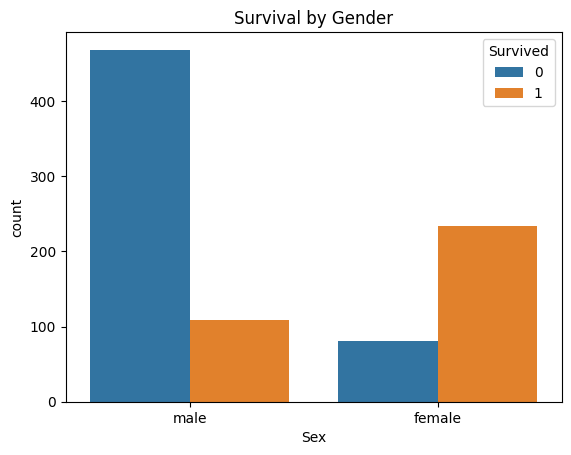

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [111]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

train.groupby('Sex')['Survived'].mean()


**Pclass (Passenger Class)**

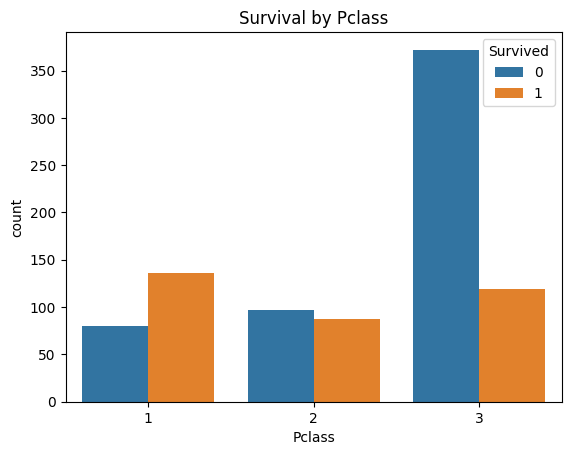

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [112]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')
plt.show()

train.groupby('Pclass')['Survived'].mean()

**AGE**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


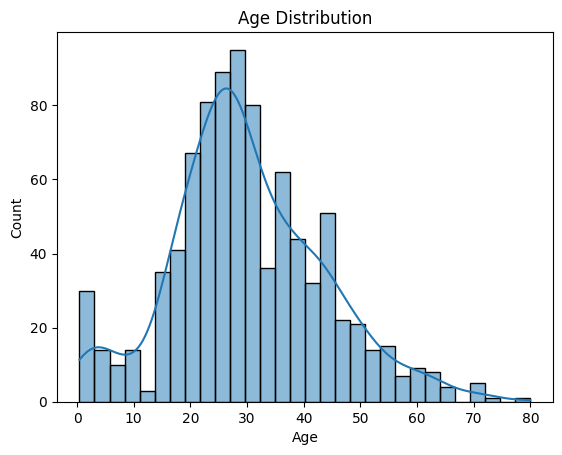

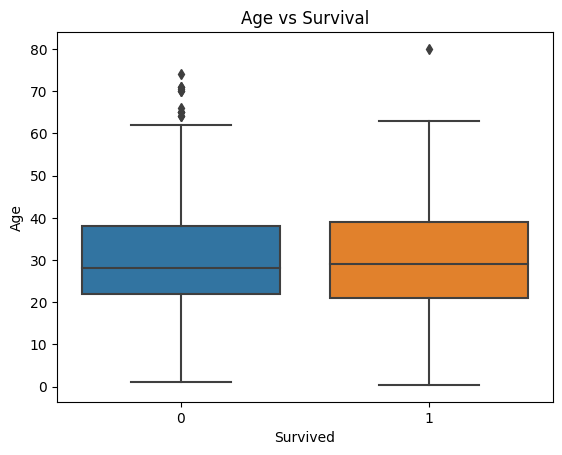

In [113]:
sns.histplot(data=train, x='Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

sns.boxplot(data=train, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()


**Embarked**

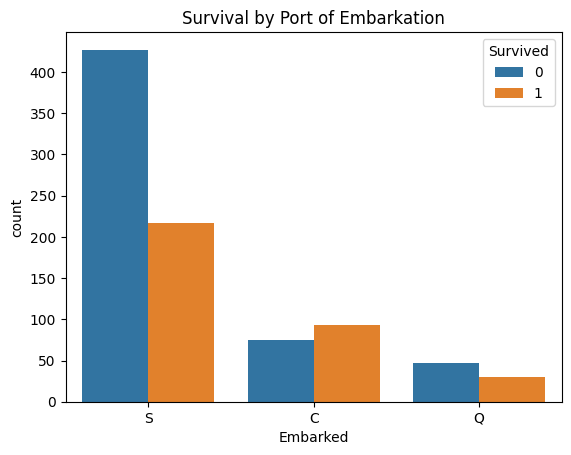

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [114]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title('Survival by Port of Embarkation')
plt.show()

train.groupby('Embarked')['Survived'].mean()


**Family Size Feature**

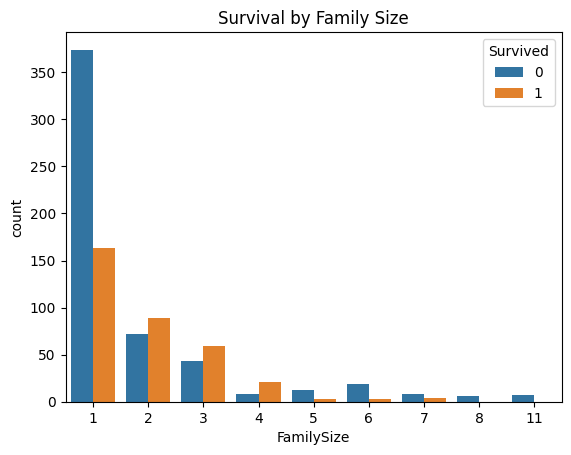

In [115]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

sns.countplot(data=train, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()


**Cabin**

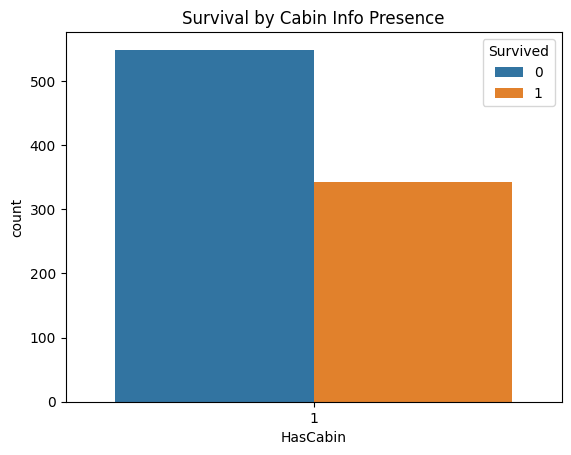

In [116]:
train['Cabin'].isnull().mean()
train['HasCabin'] = train['Cabin'].notnull().astype(int)

sns.countplot(data=train, x='HasCabin', hue='Survived')
plt.title('Survival by Cabin Info Presence')
plt.show()


* # **Embarked**

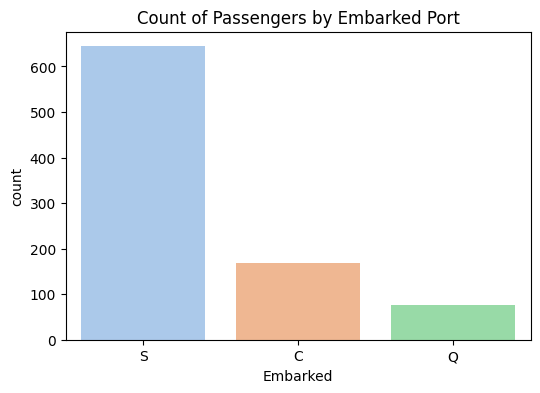

In [117]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Embarked', palette='pastel')
plt.title("Count of Passengers by Embarked Port")
plt.show()

**Survival by Sex**

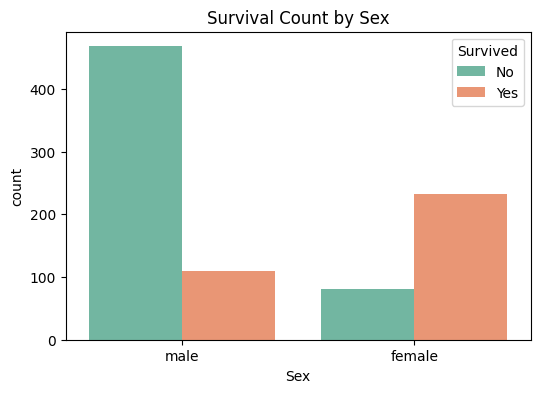

In [118]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set2')
plt.title("Survival Count by Sex")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

**Survival by Embarked**

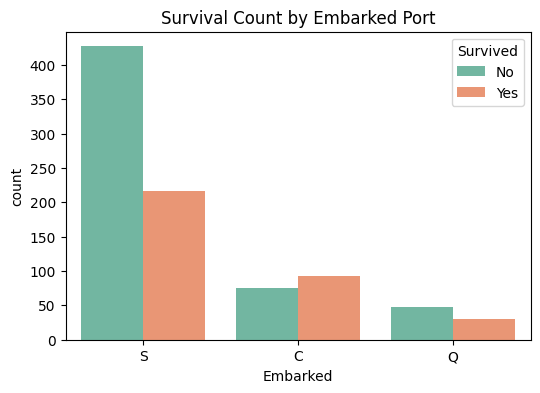

In [119]:
 
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Embarked', hue='Survived', palette='Set2')
plt.title("Survival Count by Embarked Port")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [121]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no_class,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no_class,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no_class,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,no_class,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.8,1,2,W./C. 6607,23.4500,no_class,S,4,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [122]:
train_not = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [123]:
train_cleaned = train_not.dropna().reset_index(drop=True)

# ***Feature Importance with Random Forest***

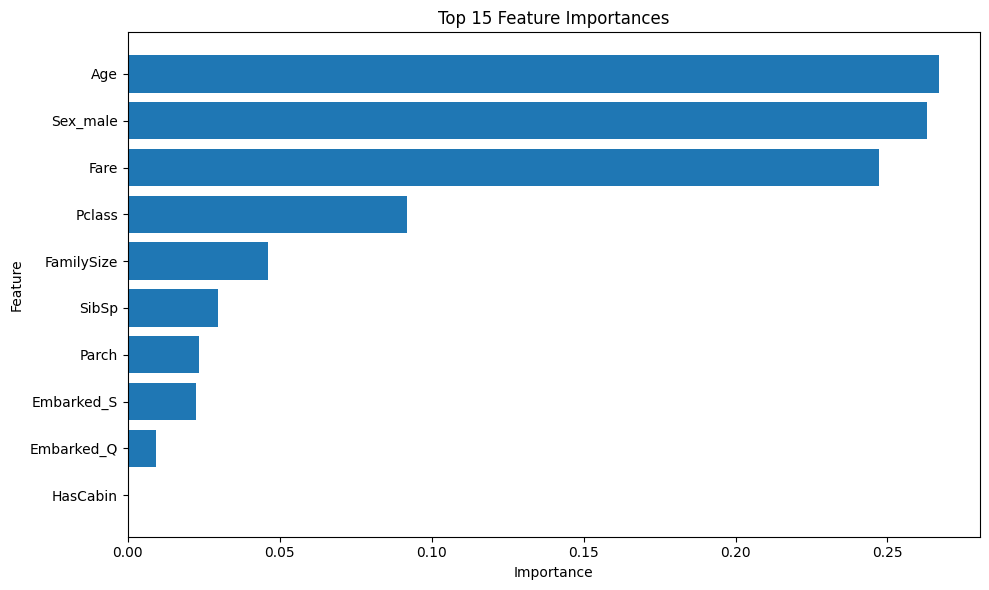

 highest feature importance is around 0.16, that's totally expected in models like Random Forest, especially with multiple features. It just means no single feature dominates,


In [124]:
# Step 3: One-Hot Encoding
train_encoded = pd.get_dummies(train_cleaned, drop_first=True)

# Let's say your features and target are:
X = train_encoded .drop(['Survived'], axis=1)
y = train_encoded ['Survived']

# Make sure all categorical variables are encoded before this
# For example, using pd.get_dummies():
X_encoded = pd.get_dummies(X)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# Get feature importances
importances = model.feature_importances_
features = X_encoded.columns

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])  # top 15
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
print(" highest feature importance is around 0.16, that's totally expected in models like Random Forest, especially with multiple features. It just means no single feature dominates,")

In [125]:
train_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,HasCabin,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,1,True,False,True
1,1,1,38.0,1,0,71.2833,2,1,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,1,False,False,True
4,0,3,35.0,0,0,8.0500,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,0,0,13.0000,1,1,True,False,True
885,1,1,19.0,0,0,30.0000,1,1,False,False,True
886,0,3,26.8,1,2,23.4500,4,1,False,False,True
887,1,1,26.0,0,0,30.0000,1,1,True,False,False


* # **Model Training**

**Define features (X) and target (y)**

In [126]:
X = train_encoded.drop(['Survived'], axis=1)  # Drop unneeded columns
y = train_encoded['Survived']

**Train-test split**

In [127]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest**

In [128]:
# Step 3: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("🧮 R² Score:", r2_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.7528089887640449
🧮 R² Score: -0.0413508841909318

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       109
           1       0.66      0.74      0.70        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178


Confusion Matrix:
 [[83 26]
 [18 51]]


In [129]:
# Step 3: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(kernel='rbf', probability=True)
}

# Step 4: Train and evaluate each model
for name, model in models.items():
    print(f"\n📌 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("🧮 R² Score:", r2_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


📌 Logistic Regression
Accuracy: 0.7921348314606742
🧮 R² Score: 0.12431857465762541
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

Confusion Matrix:
 [[87 22]
 [15 54]]

📌 XGBoost Classifier
Accuracy: 0.7752808988764045
🧮 R² Score: 0.053317378008243765
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

Confusion Matrix:
 [[86 23]
 [17 52]]

📌 Gradient Boosting
Accuracy: 0.8089887640449438
🧮 R²

# **Hyperparameter Tuning for RandomForestClassifier**

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 15],         # depth of each tree
    'min_samples_split': [2, 5, 10],        # min samples to split a node
    'min_samples_leaf': [1, 2, 4],          # min samples at a leaf node
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("🌟 Best ROC AUC Score:", grid_search.best_score_)

# Use best model to predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)
y_proba = best_rf.predict_proba(X_val)[:, 1]

# Final evaluation
from sklearn.metrics import classification_report, roc_auc_score

print("🧠 Final ROC AUC Score on Validation:", roc_auc_score(y_val, y_proba))
print("📊 Classification Report:\n", classification_report(y_val, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; tot

# **Trained Model on Test Data**

In [171]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Cabin'] = test_data['Cabin'].fillna('no_class')

In [173]:
test_data['Cabin'].isnull().mean()
test_data['HasCabin'] = test_data['Cabin'].notnull().astype(int)
test_data['Age'] = imputer.transform(test_data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])[:, 0]
test_data['Fare'] = imputer.transform(test_data[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])[:, 0]
test_cleaned = test_data.dropna().reset_index(drop=True)
test_not = test_cleaned.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [176]:
# Step 3: One-Hot Encoding
test_encoded = pd.get_dummies(test_not, drop_first=True)

In [178]:
# Predict using the best Random Forest model
test_predictions = best_rf.predict(test_encoded)

# Optionally, probabilities
test_probabilities = best_rf.predict_proba(test_encoded)[:, 1]


In [179]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file created: submission.csv")


✅ Submission file created: submission.csv
